In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller

In [2]:
def parser(s):
    return datetime.strptime(s, '%m/%d/%Y')
     

In [3]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [4]:
#read data
df = pd.read_csv('Deaths 85 yrs and above.csv', parse_dates=[1], index_col=1, squeeze=True, date_parser=parser)
df = df.asfreq(pd.infer_freq(df.index))
df = df.loc[datetime(2020,2,2):]
df = df.diff().diff().dropna()

In [5]:
df.head()

,MMWR Week,Total Deaths,COVID-19 Deaths
End Week,,,
2020-02-22,0.0,378.0,-3.0
2020-02-29,0.0,-187.0,2.0
2020-03-07,0.0,145.0,9.0
2020-03-14,0.0,-349.0,-4.0
2020-03-21,0.0,73.0,122.0


In [6]:
#check stationarity
perform_adf_test(df.index)

ADF Statistic: 0.236081
p-value: 0.974214


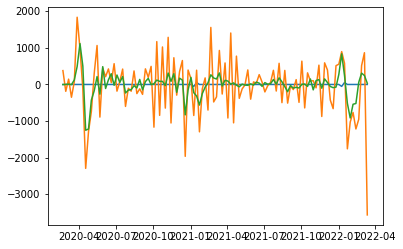

In [7]:
plt.plot(df)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


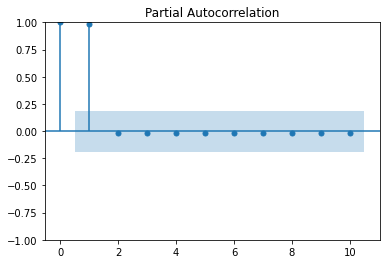

In [8]:
plot_pacf(df.index, lags=10)
plt.show()

In [9]:
#infer the frequency of the data
df = df.asfreq(pd.infer_freq(df.index))


In [10]:
start_date = datetime(2020,1,1)
end_date = datetime(2022,1,10)
lim_df = df[start_date:end_date]

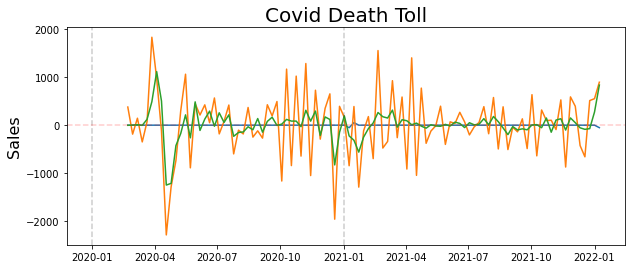

In [11]:
plt.figure(figsize=(10,4))
plt.plot(lim_df)
plt.title('Covid Death Toll', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(lim_df.empty, color='r', alpha=0.2, linestyle='--')

In [12]:
first_diff = lim_df.diff()[1:]

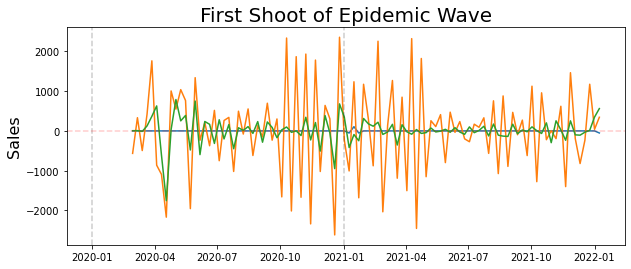

In [13]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('First Shoot of Epidemic Wave', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(first_diff.empty, color='r', alpha=0.2, linestyle='--')
